In [ ]:
!wget -O concrete_crack_images.zip "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip"


--2025-02-20 07:12:34--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245259777 (234M) [application/zip]
Saving to: ‘concrete_crack_images.zip’

concrete_crack_imag 100%[===================>] 233.90M  22.6MB/s    in 10s     

2025-02-20 07:12:45 (23.3 MB/s) - ‘concrete_crack_images.zip’ saved [245259777/245259777]



In [ ]:
!mkdir -p /resources/data



In [ ]:
!unzip -q concrete_crack_images.zip -d /resources/data/



In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# Define dataset path
dataset_path = "/resources/data/"

# Check folder structure (adjust paths if needed)
print("Dataset contents:", os.listdir(dataset_path))

# Define transformations (resizing, converting to tensors, normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load dataset using ImageFolder
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split dataset into training & validation sets (80% training, 20% validation)
train_size = int(0.8 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

print("✅ Dataset loaded into PyTorch successfully!")
print(f"Training samples: {len(train_dataset)}, Validation samples: {len(valid_dataset)}")


Dataset contents: ['Negative', 'Positive']
✅ Dataset loaded into PyTorch successfully!
Training samples: 32000, Validation samples: 8000


In [ ]:
import torchvision.models as models
import torch.nn as nn

# Load pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Modify the final layer to match our two classes (Positive/Negative)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Binary classification

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Print the modified model structure
print(model)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 133MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch.optim as optim

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer (only update the final layer)
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

print("Loss function and optimizer initialized!")


✅ Loss function and optimizer initialized!


In [ ]:
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print("Training complete!")


NameError: name 'model' is not defined

In [ ]:
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print("Training complete!")



NameError: name 'train_loader' is not defined

In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn

# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Modify the output layer for binary classification (Positive/Negative)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("ResNet18 model is now initialized and ready for training!")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 74.1MB/s]


✅ ResNet18 model is now initialized and ready for training!


In [ ]:
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print("Training complete!")


NameError: name 'train_loader' is not defined

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define dataset path
dataset_path = "/resources/data/"

# Define transformations (resize, convert to tensor, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load dataset using ImageFolder
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split dataset into training & validation sets (80% training, 20% validation)
train_size = int(0.8 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

print("✅ Dataset loaded successfully!")
print(f"Training samples: {len(train_dataset)}, Validation samples: {len(valid_dataset)}")


FileNotFoundError: [Errno 2] No such file or directory: '/resources/data/'

In [ ]:
!pip install torch torchvision ibm-cos-sdk



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.2 MB/s eta 0:0

In [ ]:
!pip install torch torchvision ibm-cos-sdk



In [ ]:
# Download dataset from IBM Object Storage
!wget -O concrete_crack_images.zip "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip"

# Extract dataset into /resources/data/
!unzip -q concrete_crack_images.zip -d /resources/data/

# Verify extraction
!ls -R /resources/data/


--2025-02-20 08:47:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245259777 (234M) [application/zip]
Saving to: ‘concrete_crack_images.zip’

concrete_crack_imag 100%[===================>] 233.90M  16.6MB/s    in 15s     

2025-02-20 08:48:01 (15.7 MB/s) - ‘concrete_crack_images.zip’ saved [245259777/245259777]

checkdir:  cannot create extraction directory: /resources/data
           No such file or directory
ls: cannot access '/resources/data/': No such file or directory


In [ ]:
# Create the directory manually
!mkdir -p /resources/data

# Now extract the dataset
!unzip -q concrete_crack_images.zip -d /resources/data/

# Verify extraction
!ls -R


.:
concrete_crack_images.zip  sample_data

./sample_data:
anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# Define dataset path
dataset_path = "/resources/data/"

# Check folder structure
print("Dataset contents:", os.listdir(dataset_path))

# Define transformations (resize, convert to tensor, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load dataset using ImageFolder
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split dataset into training & validation sets (80% training, 20% validation)
train_size = int(0.8 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

print(" Dataset loaded successfully!")
print(f"Training samples: {len(train_dataset)}, Validation samples: {len(valid_dataset)}")


Dataset contents: ['Negative', 'Positive']
 Dataset loaded successfully!
Training samples: 32000, Validation samples: 8000


In [ ]:
import torchvision.models as models
import torch.nn as nn

# Load pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Modify the final layer to match our two classes (Positive/Negative)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Binary classification

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Print the modified model structure
print(model)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch.optim as optim

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer (only update the final layer)
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

print("Loss function and optimizer initialized!")


Loss function and optimizer initialized!


In [ ]:
import time

start_time = time.time()

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

end_time = time.time()
print(f" Training completed in {round((end_time - start_time) / 60, 2)} minutes")


Epoch 1, Loss: 0.051262050388380886
Epoch 2, Loss: 0.03221721175470157
Epoch 3, Loss: 0.03076789655619359
 Training completed in 8.22 minutes


In [ ]:
model.eval()
misclassified_samples = []

with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        for i in range(len(labels)):
            if preds[i] != labels[i]:
                misclassified_samples.append((images[i].cpu(), labels[i].cpu(), preds[i].cpu()))

# Display the first 4 misclassified samples
for i in range(min(4, len(misclassified_samples))):
    image, true_label, predicted_label = misclassified_samples[i]
    print(f"Sample {i+1}: True Label = {true_label.item()}, Predicted Label = {predicted_label.item()}")


Sample 1: True Label = 1, Predicted Label = 0
Sample 2: True Label = 1, Predicted Label = 0
Sample 3: True Label = 1, Predicted Label = 0
Sample 4: True Label = 1, Predicted Label = 0


In [ ]:
import time
import matplotlib.pyplot as plt

start_time = time.time()

num_epochs = 5  # Adjust if needed
epoch_losses = []  # Store loss per epoch

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    epoch_losses.append(epoch_loss)  # Save epoch loss
    print(f"Epoch {epoch+1}, Loss: {epoch_loss}")

end_time = time.time()
print(f"✅ Training completed in {round((end_time - start_time) / 60, 2)} minutes")


KeyboardInterrupt: 

In [ ]:
# Function to calculate accuracy
def calculate_accuracy(model, dataloader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Compute accuracy on validation set
validation_accuracy = calculate_accuracy(model, valid_loader)
print(f" Model Accuracy on Validation Set: {validation_accuracy:.2f}%")


 Model Accuracy on Validation Set: 99.53%


ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

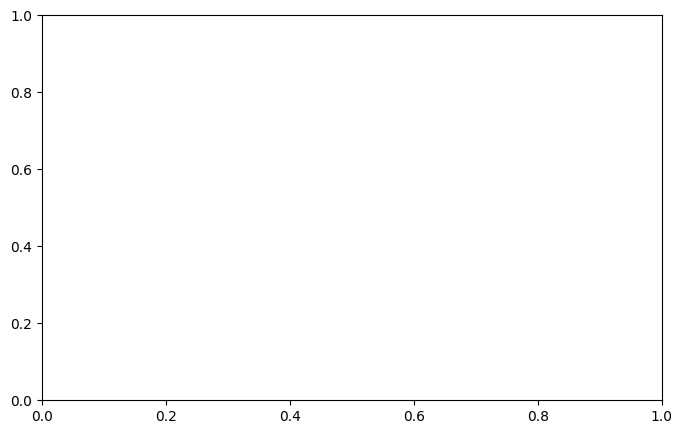

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', linestyle='-', color='b')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid()
plt.show()


In [ ]:
import time

# Reset the list to store loss values
epoch_losses = []

start_time = time.time()

num_epochs = 3  # Adjust if needed

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    epoch_losses.append(epoch_loss)  # Store epoch loss
    print(f"Epoch {epoch+1}, Loss: {epoch_loss}")

end_time = time.time()
print(f" Training completed in {round((end_time - start_time) / 60, 2)} minutes")


Epoch 1, Loss: 0.023825653836742275
Epoch 2, Loss: 0.021187976131659524
Epoch 3, Loss: 0.026933582909474355
 Training completed in 8.27 minutes


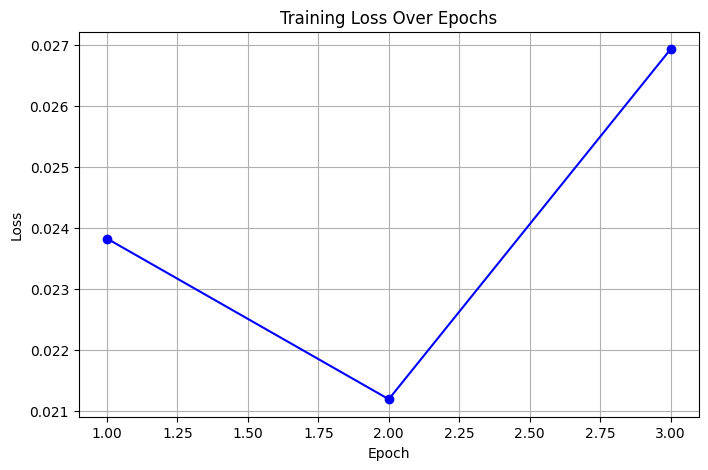

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', linestyle='-', color='b')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid()
plt.show()


In [ ]:

def calculate_accuracy(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Compute accuracy on validation set
validation_accuracy = calculate_accuracy(model, valid_loader)
print(f" Model Accuracy on Validation Set: {validation_accuracy:.2f}%")


 Model Accuracy on Validation Set: 99.64%
